The training dataset (raw data) will be pre-processed using a variety of methods, including: 
- Removing accented characters
- Expanding Contractions
- Removing Special Characters
- Case Unification 
- Stemming
- Lemmatization 
- Removing Stopwords


In [65]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction import stop_words

In [66]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [67]:
#nltk.download('stopwords')  
#nltk.download('wordnet')
from nltk.corpus import stopwords  
from nltk.corpus import wordnet  


In [68]:
len(train_data)

1306122

In [69]:
train_data.question_text.describe()

count                                  1306122
unique                                 1306122
top       What's the best color for a scooter?
freq                                         1
Name: question_text, dtype: object

In [70]:
train_data['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [71]:
train_data['num_words'] = train_data['question_text'].apply(lambda x: len(str(x).split()) )
train_data['split_words'] = train_data['question_text'].apply(lambda x: str(x).split())

In [72]:
train_data['num_words'].describe()

count    1.306122e+06
mean     1.280361e+01
std      7.052437e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.500000e+01
max      1.340000e+02
Name: num_words, dtype: float64

In [73]:
train_data['length']=train_data['question_text'].apply(len)


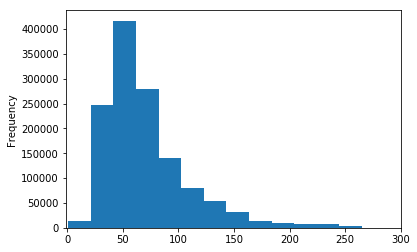

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train_data['length'].plot(bins=50,kind='hist', xlim=(-1, 300))

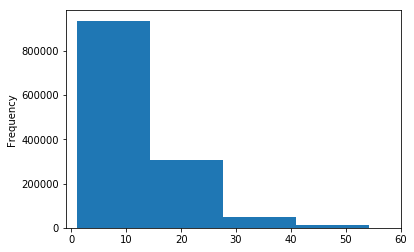

In [86]:
train_data['num_words'].plot(bins=10,kind='hist', xlim=(-1, 60))

In [84]:
train_data[train_data.num_words <= 2]

,qid,question_text,target,num_words,split_words,length
11152,0231615e52daa497c4d9,What's friendship?,0,2,"[What's, friendship?]",18
61968,0c2a113858db20e0a4db,Quora:,1,1,[Quora:],7
78445,0f5a41d6752d5d667895,Is,1,1,[Is],3
126166,18b058d2aabadb23c12d,In Islam?,0,2,"[In, Islam?]",9
151774,1daf2813f7a3069422cc,What isOrganism?,0,2,"[What, isOrganism?]",16
155026,1e52e57a821c597eee0c,Dowry:,1,1,[Dowry:],7
167457,20b87b5057a6e22133bc,Imagination:,1,1,[Imagination:],13
194300,25fca33364071fe12c03,Can coffee?,0,2,"[Can, coffee?]",11
203035,27aefd58333cae2beac1,What's pornstar?,0,2,"[What's, pornstar?]",16
230024,2cfd7dec2231e47afd6c,I 12?,0,2,"[I, 12?]",5


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)

#count_vectorizer = CountVectorizer(stop_words=stop_words.ENGLISH_STOP_WORDS)
count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [ ]:
train_text_features_cv = count_vectorizer.transform(train_text)
test_text_features_cv = count_vectorizer.transform(test_text)
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(all_text)
train_text_features_tf = tfidf_vectorizer.transform(train_text)
test_text_features_tf = tfidf_vectorizer.transform(test_text)    

In [34]:
from nltk.stem import WordNetLemmatizer
import re  
stemmer = WordNetLemmatizer()
X = train_text
documents = []

for sen in X:  
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(sen))
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [35]:
documents[0:5]

['how did quebec nationalist see their province a nation in the 1960s',
 'do you have an adopted dog how would you encourage people to adopt and not shop',
 'why doe velocity affect time doe velocity affect space geometry',
 'how did otto von guericke used the magdeburg hemisphere',
 'can convert montra helicon to mountain bike by just changing the tyre']

In [39]:
documents_df = pd.DataFrame(documents)
documents_df.head()
documents_df.columns =['question_text']
documents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 1 columns):
question_text    1306122 non-null object
dtypes: object(1)
memory usage: 10.0+ MB


In [41]:
documents_df['count'] = documents_df['question_text'].apply(lambda x: len(str(x).split()) )
documents_df['count'].describe()

count    1.306122e+06
mean     1.235181e+01
std      6.780213e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.000000e+01
75%      1.500000e+01
max      1.870000e+02
Name: count, dtype: float64

In [63]:
train_data.iloc[1130703]['question_text']

'Quora Etiquette: '

In [64]:
documents_sorted_df = documents_df.sort_values('count')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = vectorizer.fit_transform(documents).toarray()  

from sklearn.feature_extraction.text import TfidfTransformer  
tfidfconverter = TfidfTransformer()  
X = tfidfconverter.fit_transform(X).toarray()  


In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0
from sklearn.ensemble import RandomForestClassifier  
                                                    
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)  
                                                    
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

In [ ]:
import pickle  
with open('text_classifier', 'wb') as picklefile:  
    pickle.dump(classifier,picklefile)
    
with open('text_classifier', 'rb') as training_model:  
    model = pickle.load(training_model)
y_pred2 = model.predict(X_test)

print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))  
print(accuracy_score(y_test, y_pred2))  